<h1><b>MATHEMATICS FOR COMPUTER SCIENCE ENGINEERS (UE23MA242A)</b></h1>

<h1>Heart Disease Case Study</h1>

<p>1. Classify the features in the Heart Disease dataset into their appropriate data
types (ordinal, nominal, interval, or ratio). Provide a rationale for each
classification.</p>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as stats
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import math
from math import sqrt


In [7]:
data = pd.read_csv('heart_disease.csv')

In [8]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [9]:
feature_types = {
    'id':'ordinal',
    'age': 'ratio',
    'sex': 'nominal',
    'cp': 'ordinal',
    'trestbps': 'ratio',
    'chol': 'ratio',
    'fbs': 'nominal',
    'restecg': 'nominal',
    'thalach': 'ratio',
    'exang': 'nominal',
    'oldpeak': 'ratio',
    'slope': 'ordinal',
    'ca': 'ratio',
    'thal': 'nominal',
    'num':'ratio'
}

data_features=pd.DataFrame(list(feature_types.items()), columns=['Feature',  'Data_Type'])
print(data_features)

     Feature Data_Type
0         id   ordinal
1        age     ratio
2        sex   nominal
3         cp   ordinal
4   trestbps     ratio
5       chol     ratio
6        fbs   nominal
7    restecg   nominal
8    thalach     ratio
9      exang   nominal
10   oldpeak     ratio
11     slope   ordinal
12        ca     ratio
13      thal   nominal
14       num     ratio


<p>2. A summary statistic provides a numerical summary of a specific feature within
the dataset.There are two commonly used categories of summary statistics:
those that indicate the central tendency and those that indicate the spread of the
data. Identify the most appropriate measure of central tendency for each attribute
in the dataset and state its corresponding value. Additionally, calculate the
standard deviation and range of values for each column.</p>

In [10]:
data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [11]:
maxd=data.describe().max()
mind=data.describe().min()
ranged=maxd-mind
print(ranged)

id          919.000000
age         910.575315
trestbps    861.000000
chol        890.000000
thalch      839.073724
oldpeak     860.600000
ca          309.000000
num         920.000000
dtype: float64


In [12]:
std_dev_df = data.select_dtypes(include='number').std()
print(std_dev_df)

id          265.725422
age           9.424685
trestbps     19.066070
chol        110.780810
thalch       25.926276
oldpeak       1.091226
ca            0.935653
num           1.142693
dtype: float64


In [13]:
mean_df = data.select_dtypes(include='number').mean()
print(mean_df)

id          460.500000
age          53.510870
trestbps    132.132404
chol        199.130337
thalch      137.545665
oldpeak       0.878788
ca            0.676375
num           0.995652
dtype: float64


In [14]:
median_df = data.select_dtypes(include='number').median()
print(median_df)

id          460.5
age          54.0
trestbps    130.0
chol        223.0
thalch      140.0
oldpeak       0.5
ca            0.0
num           1.0
dtype: float64


In [15]:
mode_df = data.select_dtypes(include='number').mode()
print(mode_df)

      id   age  trestbps  chol  thalch  oldpeak   ca  num
0      1  54.0     120.0   0.0   150.0      0.0  0.0  0.0
1      2   NaN       NaN   NaN     NaN      NaN  NaN  NaN
2      3   NaN       NaN   NaN     NaN      NaN  NaN  NaN
3      4   NaN       NaN   NaN     NaN      NaN  NaN  NaN
4      5   NaN       NaN   NaN     NaN      NaN  NaN  NaN
..   ...   ...       ...   ...     ...      ...  ...  ...
915  916   NaN       NaN   NaN     NaN      NaN  NaN  NaN
916  917   NaN       NaN   NaN     NaN      NaN  NaN  NaN
917  918   NaN       NaN   NaN     NaN      NaN  NaN  NaN
918  919   NaN       NaN   NaN     NaN      NaN  NaN  NaN
919  920   NaN       NaN   NaN     NaN      NaN  NaN  NaN

[920 rows x 8 columns]


<p>3. Identify and describe any data quality issues or inconsistencies within the Heart
Disease dataset. What steps would you take to clean and preprocess the data to
ensure its accuracy and reliability for further analysis?</p>

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [17]:
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

<Axes: >

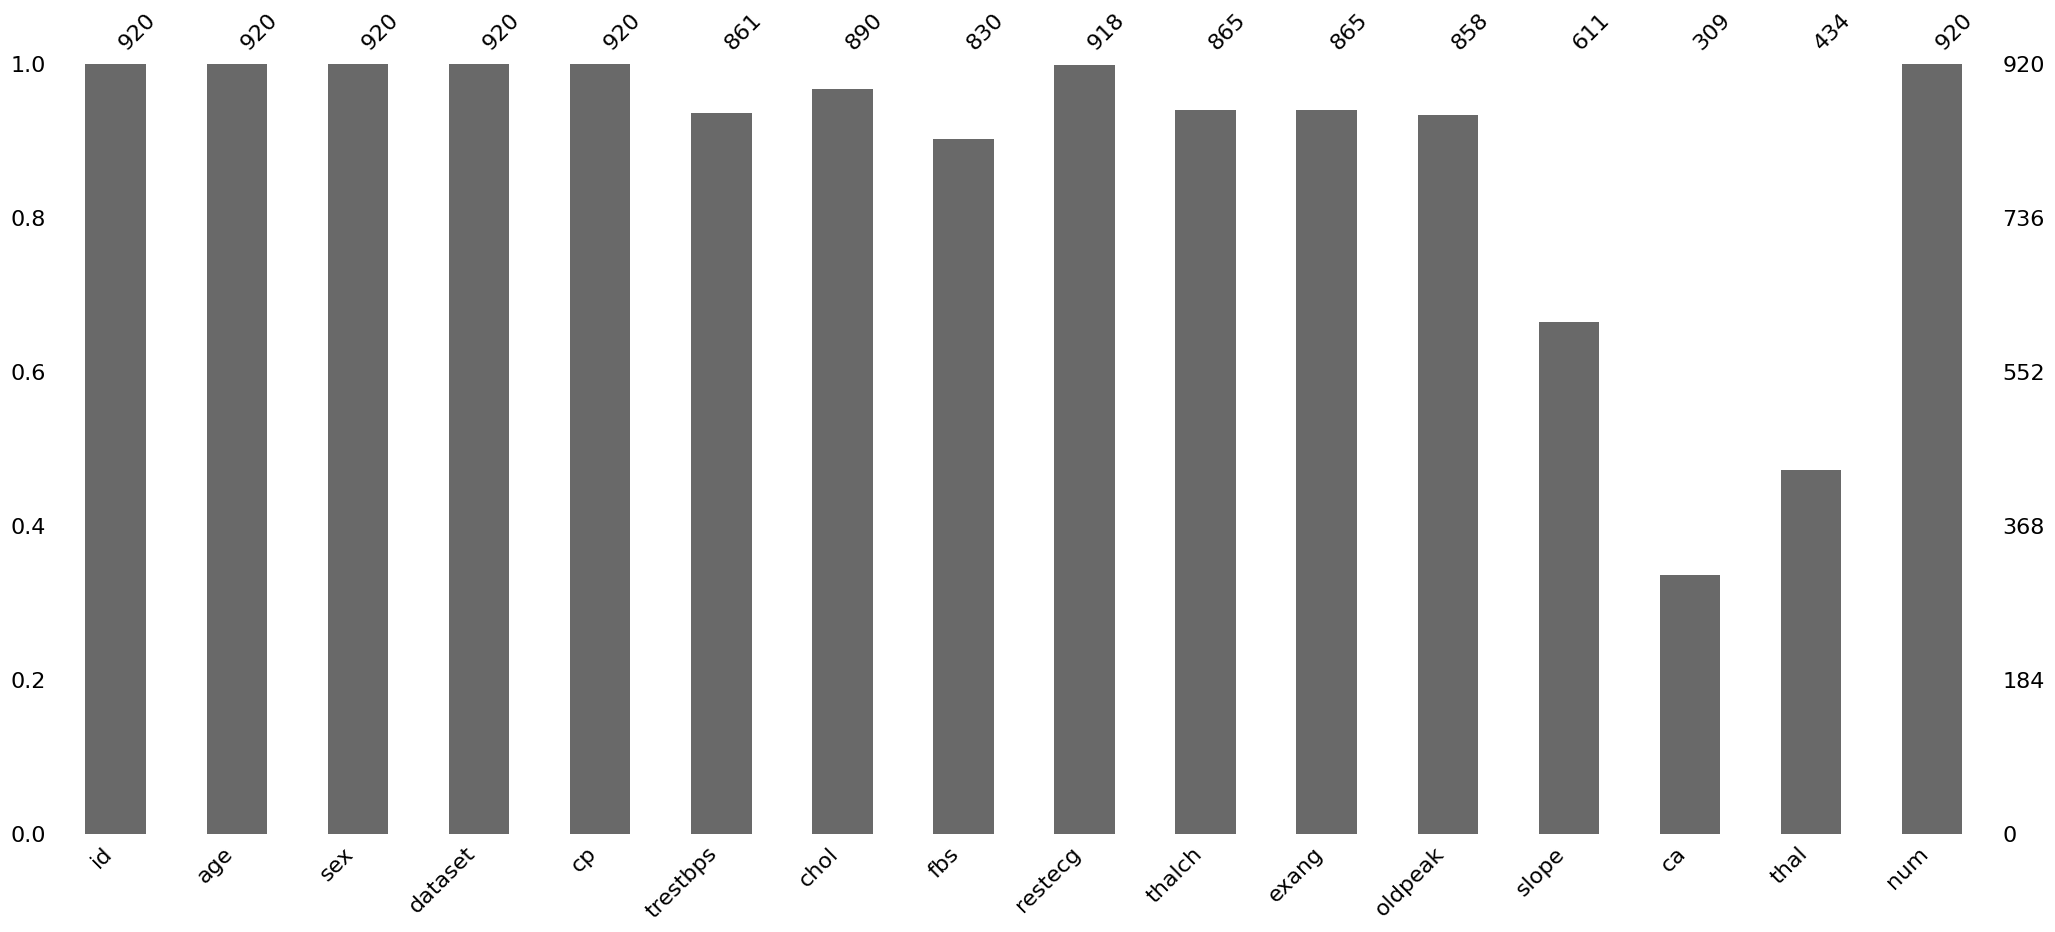

In [18]:
msno.bar(data)

In [19]:
data=data.fillna(0)

<Axes: >

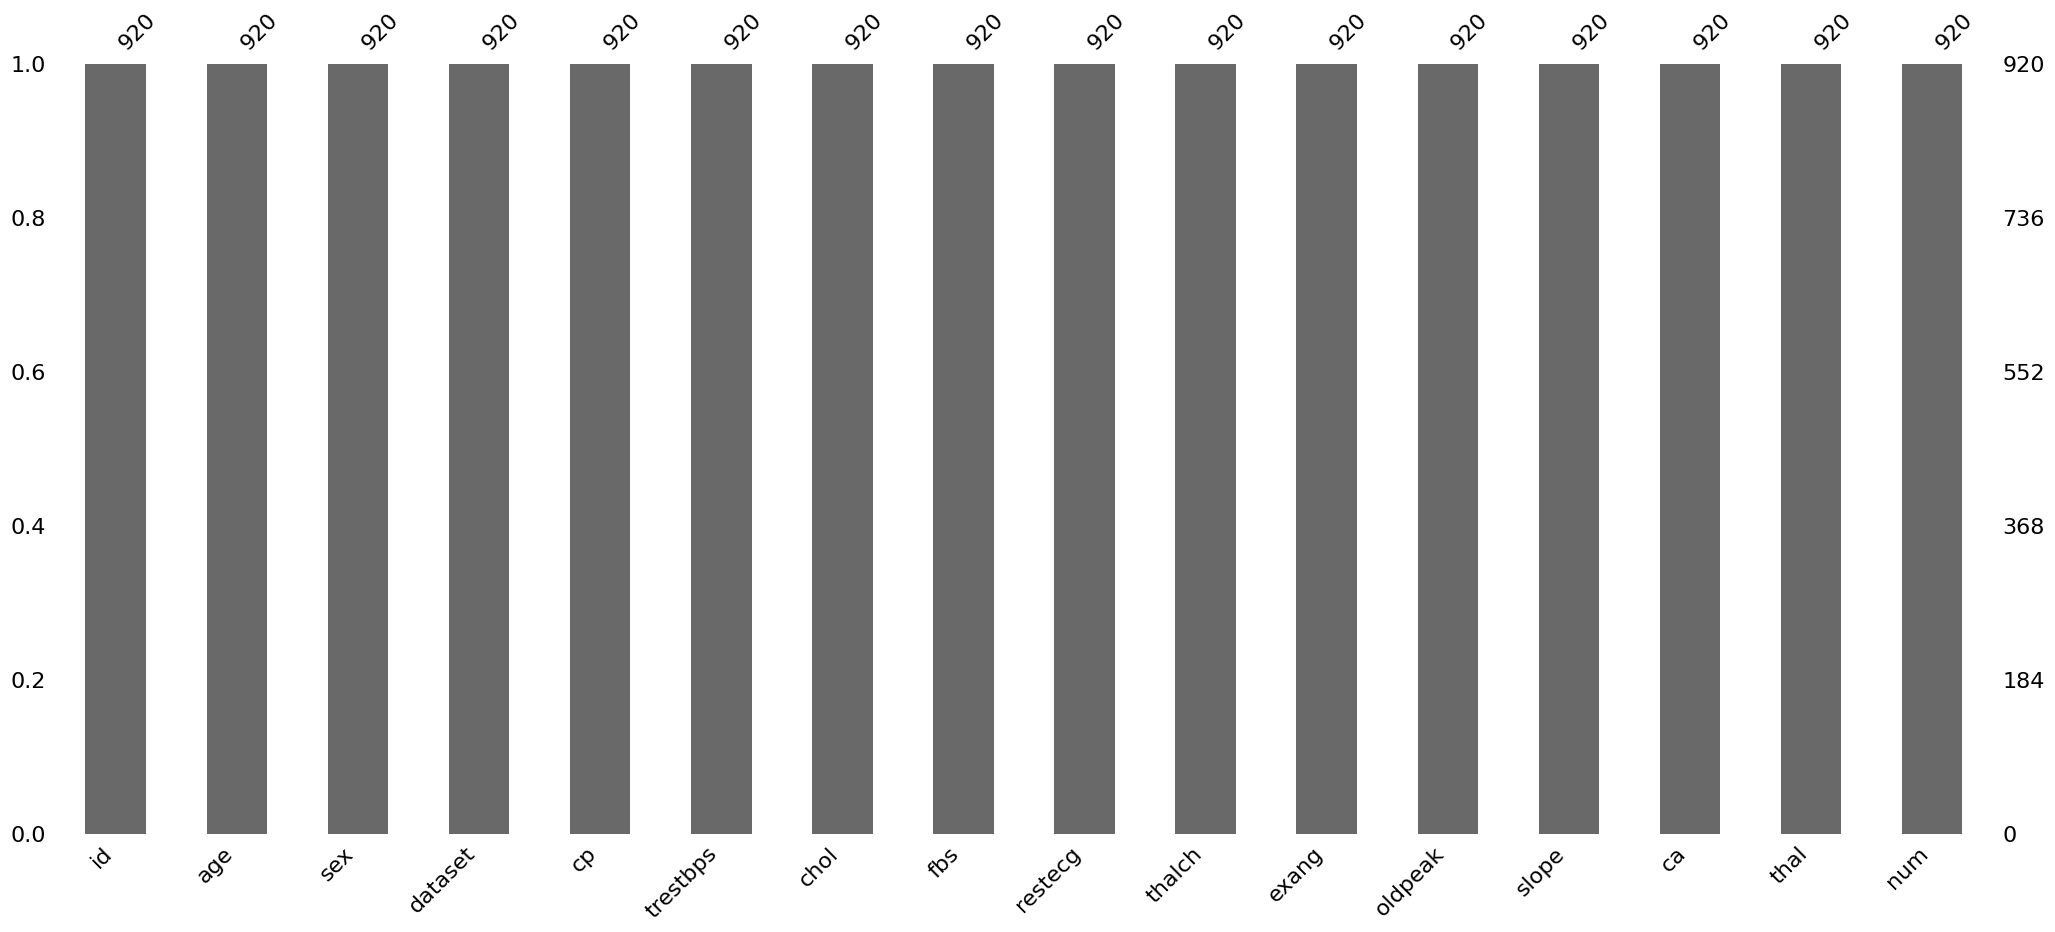

In [20]:
msno.bar(data)

<p>4. Using a histogram and box plot, assess the presence of outliers in the 'age' and
'chol' variables. Describe the visualizations, identify any potential outliers, and
explain how you determined their presence or absence.</p>

Text(0.5, 1.0, 'Histogram of Age')

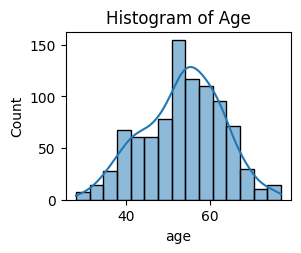

In [21]:
plt.subplot(2, 2, 1)
sns.histplot(data['age'], kde=True, bins=15)
plt.title("Histogram of Age")

Text(0.5, 1.0, 'Box Plot of Age')

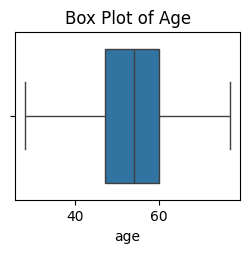

In [22]:
plt.subplot(2, 2, 2)
sns.boxplot(x=data['age'])
plt.title("Box Plot of Age")

Text(0.5, 1.0, 'Histogram of Cholesterol')

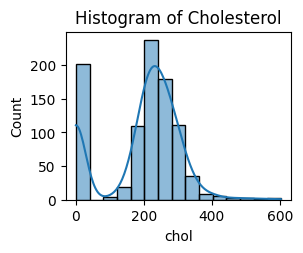

In [23]:
plt.subplot(2, 2, 3)
sns.histplot(data['chol'], kde=True, bins=15)
plt.title("Histogram of Cholesterol")

Text(0.5, 1.0, 'Box Plot of Cholesterol')

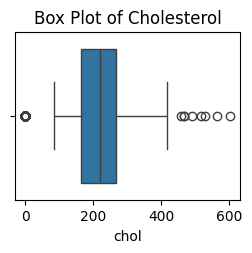

In [24]:
plt.subplot(2, 2, 4)
sns.boxplot(x=data['chol'])
plt.title("Box Plot of Cholesterol")

<p>5. What actions would you take to resolve the presence of outliers? Visualize the
changes using box plots and histograms.</p>

In [25]:
q1=data['age'].quantile(0.25)
q3=data['age'].quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
data=data[(data['age']<upper)&(data['age']>lower)]
data['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

<Axes: >

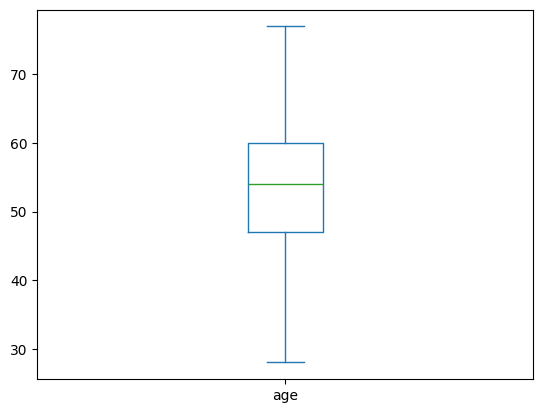

In [26]:
%matplotlib inline
data['age'].plot(kind='box')

<Axes: ylabel='Frequency'>

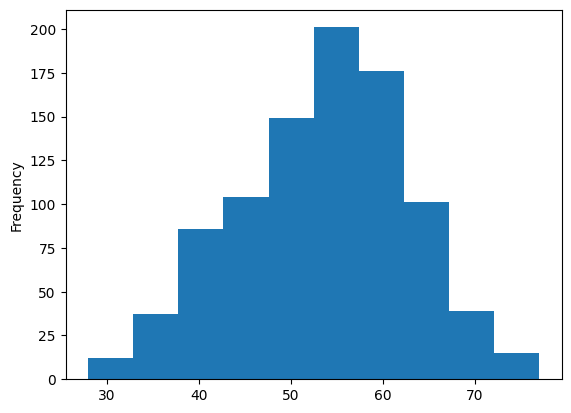

In [27]:
data['age'].plot(kind='hist')

In [28]:
q1=data['chol'].quantile(0.25)
q3=data['chol'].quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
data=data[(data['chol']<upper)&(data['chol']>lower)]
data['chol'].describe()

count    710.000000
mean     243.843662
std       51.328221
min       85.000000
25%      209.000000
50%      238.500000
75%      275.000000
max      417.000000
Name: chol, dtype: float64

<Axes: >

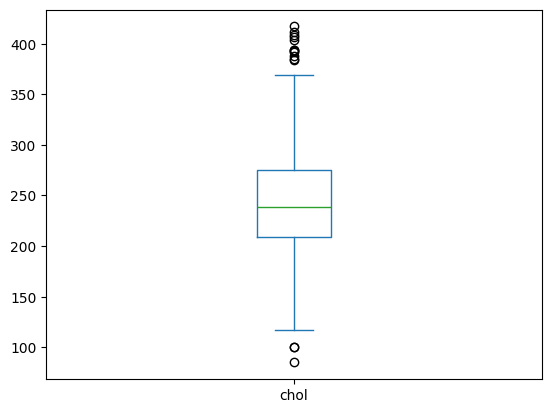

In [29]:
%matplotlib inline
data['chol'].plot(kind='box')

<Axes: ylabel='Frequency'>

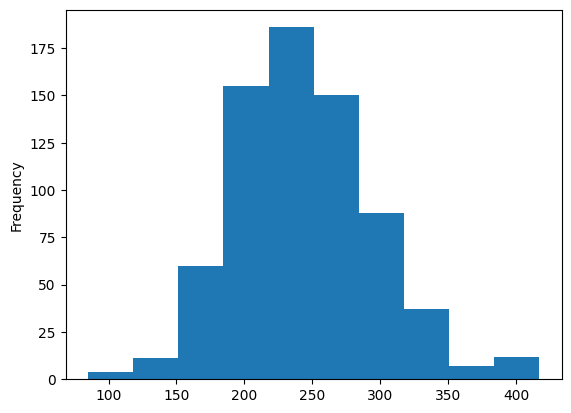

In [30]:
data['chol'].plot(kind='hist')

<p>6. Examine the normal probability plot (Q-Q plot) for the 'chol' variable in the Heart
Disease dataset. Based on the shape and trend of the plot, what conclusions can
be drawn? Provide a rationale for your conclusions.</p>

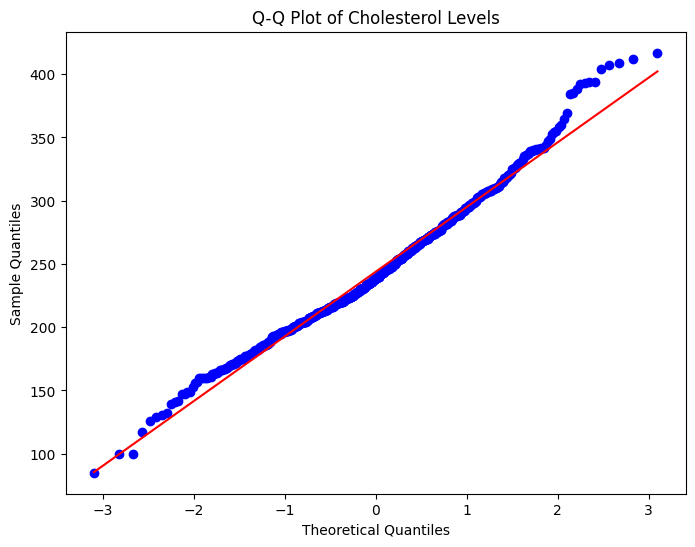

In [31]:
plt.figure(figsize=(8, 6))
stats.probplot(data['chol'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Cholesterol Levels")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

<p>7. Calculate the correlation between 'Age' and all the other numerical variables
(e.g., 'trestbps' or 'thalach’'). Set a correlation threshold and create a heatmap to
visualize the relationships.</p>


No correlations above the threshold were found.


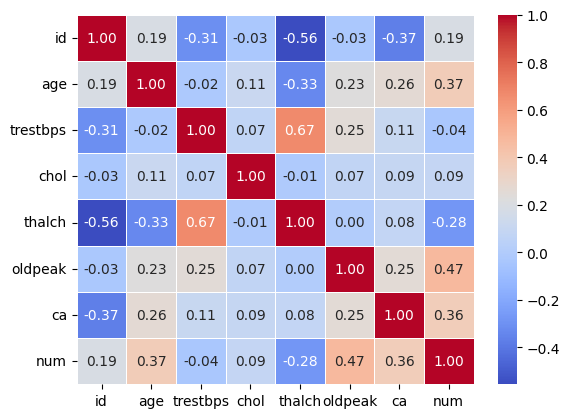

In [32]:
numeric_data = data.select_dtypes(include=[float, int])
corr_matrix = numeric_data.corr()
age_corr = corr_matrix['age'].drop('age')
threshold = 0.5
strong_corr = age_corr[abs(age_corr) >= threshold]
if strong_corr.empty:
    print("No correlations above the threshold were found.")
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
else:
    print("is not empty")
    plt.figure(figsize=(8, 5))
    sns.heatmap(strong_corr.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

<p>8. Generate a pairplot that includes the variables 'age', 'chol', and 'thalach' while
using 'num' as the hue in the dataset. What insights can be gained from the
pairplot, and how does it help in visualizing the relationships between the given
features and heart disease prevalence?</p>

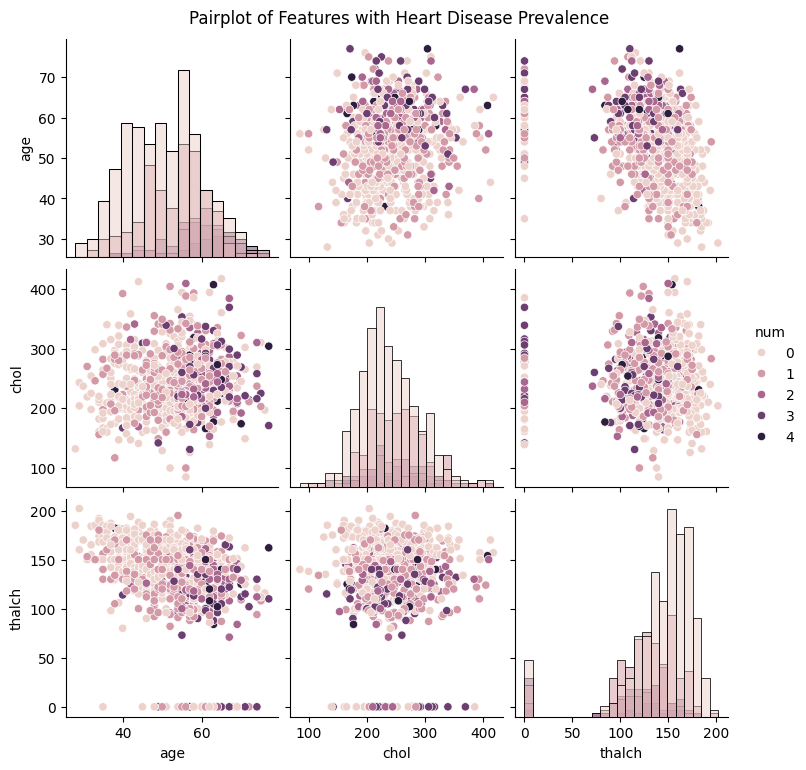

In [33]:
data1 = data[['age', 'chol', 'thalch', 'num']]
sns.pairplot(data1, hue='num', diag_kind='hist')
plt.suptitle('Pairplot of Features with Heart Disease Prevalence', y=1.02)
plt.show()

<p>9. Is there a statistically significant difference in the mean cholesterol levels
between individuals with heart disease (num > 0) and those without heart
disease (num = 0)? Formulate the null and alternative hypotheses, then conduct
a T-test to examine this relationship. Additionally, plot a histogram to visualize the
cholesterol distribution for each group. Use a significance level of 0.05.</p>

In [34]:
no_heart_disease = data[data['num'] == 0]['chol']
heart_disease = data[data['num'] > 0]['chol']

mean_no_heart_disease = np.mean(no_heart_disease)
mean_heart_disease = np.mean(heart_disease)
var_no_heart_disease = np.var(no_heart_disease, ddof=1)
var_heart_disease = np.var(heart_disease, ddof=1)
n_no_heart_disease = len(no_heart_disease)
n_heart_disease = len(heart_disease)

print(f"Mean Cholesterol - No Heart Disease: {mean_no_heart_disease}")
print(f"Mean Cholesterol - Heart Disease: {mean_heart_disease}")
print(f"Variance - No Heart Disease: {var_no_heart_disease}")
print(f"Variance - Heart Disease: {var_heart_disease}")
print(f"Sample Size - No Heart Disease: {n_no_heart_disease}")
print(f"Sample Size - Heart Disease: {n_heart_disease}")

t_stat, p_value = ttest_ind(heart_disease, no_heart_disease, equal_var=False)

print(f"\nT-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in mean cholesterol levels.")
else:
    print("Fail to reject the null hypothesis: No statistically significant difference in mean cholesterol levels.")

Mean Cholesterol - No Heart Disease: 238.0731707317073
Mean Cholesterol - Heart Disease: 250.08797653958945
Variance - No Heart Disease: 2576.0136532343586
Variance - Heart Disease: 2630.4863550112127
Sample Size - No Heart Disease: 369
Sample Size - Heart Disease: 341

T-Statistic: 3.134226930760988
P-Value: 0.001794804627715705
Reject the null hypothesis: There is a statistically significant difference in mean cholesterol levels.


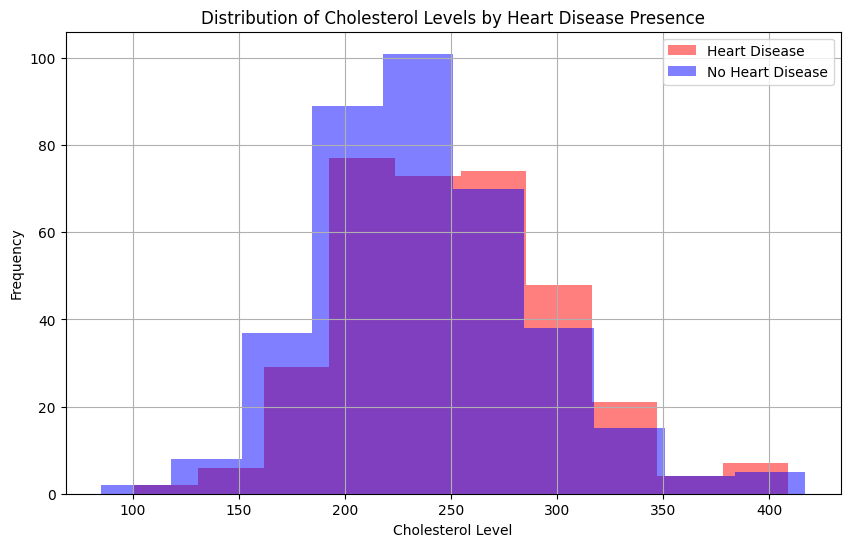

In [35]:
heart_disease = data[data['num'] > 0]
no_heart_disease = data[data['num'] == 0]
plt.figure(figsize=(10, 6))
plt.hist(heart_disease['chol'], bins=10, alpha=0.5, label='Heart Disease', color='red')
plt.hist(no_heart_disease['chol'], bins=10, alpha=0.5, label='No Heart Disease', color='blue')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')
plt.title('Distribution of Cholesterol Levels by Heart Disease Presence')
plt.legend()
plt.grid(True)
plt.show()

<p>10. Calculate the margin of error to quantify the precision of the analysis done
previously and infer what you can deduce from the results.</p>

In [36]:
confidence_level = 0.95
sample_size = len(data)
sample_mean =data['chol'].mean()
sample_std_dev = data['chol'].std()

standard_error = sample_std_dev / math.sqrt(sample_size)

z_score = stats.norm.ppf((1 + confidence_level) / 2)

margin_of_error = z_score * standard_error

print(f"Margin of Error: {margin_of_error}")
print(f"Confidence Interval: ({sample_mean - margin_of_error}, {sample_mean + margin_of_error})")

Margin of Error: 3.775505667669898
Confidence Interval: (240.06815630416108, 247.6191676395009)


<p>11. Perform a linear regression analysis to predict the variable chol (cholesterol level)
using the features age, trestbps (resting blood pressure), thalch (maximum heart rate
achieved), oldpeak (ST depression induced by exercise), ‘ca’ (number of major vessels),
and ‘num’ (Diagnosis of heart disease). Validate the model using performance metrics like
RMSE, MSE, and R-squared values to assess the model's effectiveness.</p>

In [37]:
x=data.drop(['id','sex','dataset','cp','chol','fbs','restecg','exang','ca','slope','thal'],axis=1).values
y=data['chol'].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [38]:
reg=LinearRegression()
reg.fit(X_train_scaled,y_train)

LinearRegression()

In [39]:
y_pred=reg.predict(X_test_scaled)
y_pred

array([[235.5982742 ],
       [243.41871667],
       [250.2454964 ],
       [246.8219228 ],
       [245.11266134],
       [246.12872179],
       [239.569383  ],
       [256.34069376],
       [237.94343557],
       [239.14405636],
       [251.28546786],
       [245.96784892],
       [241.82226888],
       [244.4773764 ],
       [245.60090429],
       [241.01503295],
       [247.96955126],
       [236.93031499],
       [239.14975937],
       [246.96285021],
       [250.83510338],
       [243.92601137],
       [251.84628612],
       [243.46856812],
       [252.88199244],
       [238.66730235],
       [253.74521218],
       [243.428738  ],
       [247.94311583],
       [251.34057563],
       [237.35921011],
       [241.89514512],
       [242.8374003 ],
       [250.53965896],
       [237.82805509],
       [251.07718541],
       [251.2642355 ],
       [241.08714057],
       [238.45204372],
       [246.62716614],
       [237.57241604],
       [242.56114795],
       [242.51247817],
       [250

In [40]:
y_test=y_test.ravel()
y_pred=y_pred.ravel()

In [41]:
Acutl_predict=pd.DataFrame({'Actual':y_test,'predicted':y_pred})
Acutl_predict

,Actual,predicted
0,307.0,235.598274
1,205.0,243.418717
2,234.0,250.245496
3,283.0,246.821923
4,292.0,245.112661
...,...,...
279,233.0,245.863392
280,175.0,240.969414
281,249.0,246.344159
282,260.0,249.589251


In [42]:
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("mse :",mse)
print("r2 :",r2)
print("rmse :",rmse)

mse : 2897.2419073986844
r2 : 0.011960238243182153
rmse : 53.826033732745756


<p>12. To improve the model’s predictive power in assessing heart disease risk, consider
what additional features could be engineered from the existing data. Explain what new
variables you would create and why they could enhance the predictive accuracy of the
model.</p>

<h4>Feature Engineering: </h4>Select relevant features, create new features, and transform features (e.g., polynomial features).
<h4>Model Selection:</h4> Try more complex models like Random Forest, Gradient Boosting, or XGBoost.
<h4>Hyperparameter Tuning:</h4> Use grid search or randomized search to tune the model’s hyperparameters.
<h4>Validation:</h4> Use cross-validation to estimate model performance and avoid overfitting.
<h4>Ensemble Learning:</h4> Combine models to improve performance.